# **SENDY LOGISTICS CHALLENGE**

## **DATA PREPROCESSING**

## Introduction

## Problem Statement

#### The predictive accuracy of the classification models is vital and significant in any model life cycle. This paper addresses the pickup and arrival time of packages using predictions. In order to help the business make informed inferences to their clients, a robust predictive model with the ability to accurately predict the time using historical data will enable business solutions.

## Import Libraries 

In [55]:
#import all the important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading the necessary libraries for visualization and computation.

*   Numpy : For calculations
*   Matplotlib.pyplot: For visualization
*   Pandas: For loading datasets
*   Seaborn: For advanced visualization








## Import Dataset

### Import the Training, Test, VariableDefinitions and RiderId and Inpecting each DataSet

In [56]:
#importing the Variable Defination to get detailed information about each variable.
dictionary = pd.read_csv('VariableDefinitions.csv')
dictionary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


The Dictionary Dataframe gives prepares us about the identity of each Variable and thier meaning relating to the Dataset.

### Train DataSet

In [57]:
#import training dataset and observe the results
train_set = pd.read_csv('Train.csv')
print(len(train_set.columns))
print(train_set.columns)

29
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')


Inspecting the total count of the  train dataset variables,and observing the names of each variable.
There is a total of 29 Variables, One of them being the Depenedent Variable which leave us with 28 Idependent Variables.

### Train Dataset

In [58]:
test_set = pd.read_csv('Test.csv')
print(len(test_set.columns))
print(test_set.columns)

25
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')


Loading the Test Dataset, Inspecting the total count of the dataset variables,and observing the names of each variable.

There are 25 Variables int the test Dataset, It makes sense to have fewer columns in the test dataset assuming this dataset does not have the Dependent Variable

We can conclude the following after observing the variable count and variable name for both the Train and Test dataset:


*   The Train dataset has 29 varibale, wherease the Test dataset has only 24 variable.
*   Assuming our test dataset is unseen data it is expected to have a difference of n-1(n is the number of columns) n-1 being the absence of one column which is the dependent variable our model will predict.



In [59]:
rider_info = pd.read_csv('Riders.csv')
print(len(rider_info.columns))
print(rider_info.columns)

5
Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')


In [60]:
for column in train_set.columns:
    if column not in test_set.columns:
        print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


We already know that the total count of the Train and Test dataset does not match, It will be appropiate to observe the variables contributing to this incosistency in the Train and Test Dataset. Frrom the Above we can observe the following:


*   There are 3 Variable in the Train dataframe which are not in the Train Dataset,namely Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Time from Pickup to Arrival.
*   It would make sense to have one variable missing in the Train dataset because its unseen, which means it won't have the Idependent Variable.
*   The Purpose of this task is to prepare the model for unseen data, with that in mind, it will be important that the trained dataset and the testing dataset have matching variable.
*   We would need to perform Data Cleaning to make sure our dataset matches correctly.

In [21]:
train_set.drop(['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time'], axis=1, inplace=True)
print(len(train_set.columns))
print(train_set.columns)

26
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')


Cleaning Our data Data would mean getting rid of variables that are in one dataset but not the other.

We dropped 3 Variable in the Train Dataset namely:
Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time;The reason why we drop these variable in our train More conceptually, when training your model, it learns a set of parameters with a shape that matches the dimensionality of your featureset (the number of columns in your training set). If your test set is missing one or more of the columns that were in your training set, when your model attempts to make predictions using the coefficients it's learned, it will suddenly be surprised to find that there are no values in the test row to multiply by those coefficients that it learned from the columns that were originally in the training set (but now are missing from the test set). This is the point at which your model would most likely throw an error.
We kept One Variable which is Time from Pickup to Arrival, This variable is kept beacuse it is Our Dependent Variable.


In [22]:
train_set = pd.merge(train_set, rider_info, on='Rider Id', how= 'left')

test_set = pd.merge(test_set, rider_info, on='Rider Id', how= 'left')

There are more variables that included in the Rider Info that we can use to improve our model prediction accuracy, One of the methods for improving Models is to add more variables.

To achieve this we have to add the variables to both our Train and Test dataset, from the Rider Infor dataset.

In [23]:
column_titles = [col for col in train_set.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
train_set= train_set.reindex(columns=column_titles)

In pandas when you merge two dataframe together the .merge() method has a parametre 'How' to specify which side do you want the dataframes to be merged. This will result into a new dataframe,depending on which side you added the dataframe the new columns will the be place there.
Since it is always advisable to keep our dependent variable on the last column, we need to rearrange the columns positions.

In [24]:
train_set.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,396,339,13.6,69,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,1023,242,12.5,114,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,886,283,14.5,113,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,2311,872,14.1,533,1214


In [25]:
test_set.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


## Data Cleaning

###### Now That we have made sense of our datasets, we need to perform data Cleaning,in a way that Machine learning can be able to interpret our dataset in order to achieve diesrable outcomes

In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              21201 non-null  object 
 1   User Id                               21201 non-null  object 
 2   Vehicle Type                          21201 non-null  object 
 3   Platform Type                         21201 non-null  int64  
 4   Personal or Business                  21201 non-null  object 
 5   Placement - Day of Month              21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 7   Placement - Time                      21201 non-null  object 
 8   Confirmation - Day of Month           21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 10  Confirmation - Time                   21201 non-null  object 
 11  Arrival at Pick

The info() methods gives us an important obeservation such as:
* Total Number of Rows: 21201 entries
* Total Number of Columns: 30 columns
* Non-Null Count: It appears that two columns in our Train Dataset contain Missing Values.
* Dtype: It appears that our data set is made up of different Datatypes.

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

The info() methods gives us an important obeservation such as:
* Total Number of Rows: 7068 entries
* Total Number of Columns: 29 columns
* Non-Null Count: It appears that two columns in our Train Dataset contain Missing Values.
* Dtype: It appears that our data set is made up of different Datatypes.

#### Filling in missing entries
Missing values in a dataFrame are represented by NAN. There are various ways to handle missing values.
The following methods can be used to explore missing values:
1. Drop the column with the missing values.
2. Use the fillna method to replace the missing values with a value or use aggregation methods. 

In [28]:
train_set['Temperature'] = train_set['Temperature'].fillna(train_set['Temperature'].mean())
test_set['Temperature'] = test_set['Temperature'].fillna(test_set['Temperature'].mean())

train_set['Precipitation in millimeters'] = train_set['Precipitation in millimeters'].fillna(0)
test_set['Precipitation in millimeters'] = test_set['Precipitation in millimeters'].fillna(0)


The Temparature variable has missing values and it makes sense to replace the missing values with a mean, every day has a temperature value that is recorded every where in the wolrd. 

The Precipitation variable also has missing values, Kenya experiences rainfall once in 50 days. The missing values in the precipitation variable indicates that the event did not occur hence replacing the missing values with a 0.

In [29]:
train_set.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,396,339,13.6,69,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,1023,242,12.5,114,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,886,283,14.5,113,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,2311,872,14.1,533,1214


In [30]:
test_set.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,0.0,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,0.0,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,0.0,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,0.0,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,0.0,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [31]:
test_copy = test_set.copy()

Since we are will be making alot of Changes to the test dataset, we would want to keep the original unmodified dataset.

### Non-Numerical Data

In [32]:
test_set.select_dtypes(include=['object']).columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Rider Id'],
      dtype='object')

In [33]:
len(test_set.select_dtypes(include=['object']).columns)

9

There are 9 Categorical Variable in our Dataset.

### Numeric Data

In [34]:
train_set.select_dtypes(exclude=['object']).columns

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival'],
      dtype='object')

In [35]:
len(train_set.select_dtypes(exclude=['object']).columns)

21

There are 21 Numeric Variables in our Dataset.

### Dropping Non-Numerical Data

In [36]:
train_set.drop(['User Id', 'Vehicle Type','Order No', 'Rider Id' ],axis=1, inplace=True)

test_set.drop(['User Id', 'Vehicle Type','Order No', 'Rider Id' ],axis=1, inplace=True)

The reasons for dropping the following:
* User id, Order No, Rider id: All this three variables are identifiers and they are going to take up a lot of RAM memory.
* Vehicle Type: The values the same throughout the dataframe because they are using the same vehicle type.

In [37]:
train_set.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,745
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,0.0,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69,1993
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,0.0,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114,455
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,0.0,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113,1341
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,0.0,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,533,1214


In [38]:
test_set.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,...,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,...,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45
2,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,...,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67
3,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,...,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44
4,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,...,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010


# Statistical analysis on variables

In [39]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Distance (KM),21201.0,9.506533,5.668963,1.000000,5.000000,8.000000,13.000000,49.000000


Checking the five number summary for each variable.

In [40]:
train_set.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,...,-0.011401,-0.002742,0.021327,0.006319,0.043924,0.024060,-0.074029,-0.014664,-0.031886,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,...,-0.044518,-0.004929,-0.005453,0.007541,0.002077,0.008096,-0.000107,0.012790,-0.001709,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,...,-0.024879,-0.000918,0.011008,-0.004299,-0.000875,-0.024226,-0.015475,-0.006834,-0.025747,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,...,-0.044520,-0.004923,-0.005448,0.007550,0.002073,0.008099,-0.000114,0.012796,-0.001712,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,...,-0.024886,-0.000883,0.011036,-0.004251,-0.000900,-0.024205,-0.015514,-0.006803,-0.025768,0.009744
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,...,-0.044520,-0.004923,-0.005448,0.007550,0.002073,0.008099,-0.000114,0.012796,-0.001712,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,...,-0.024886,-0.000883,0.011036,-0.004251,-0.000900,-0.024205,-0.015514,-0.006803,-0.025768,0.009744
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,...,-0.044520,-0.004923,-0.005448,0.007550,0.002073,0.008099,-0.000114,0.012796,-0.001712,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,...,-0.024886,-0.000883,0.011036,-0.004251,-0.000900,-0.024205,-0.015514,-0.006803,-0.025768,0.009744
Distance (KM),0.005528,-0.007585,0.003582,-0.007587,0.003574,-0.007587,0.003574,-0.007587,0.003574,1.000000,...,-0.001761,-0.124338,0.178537,-0.079366,0.135397,0.037186,0.036239,-0.008200,0.051806,0.580608


# Correlation

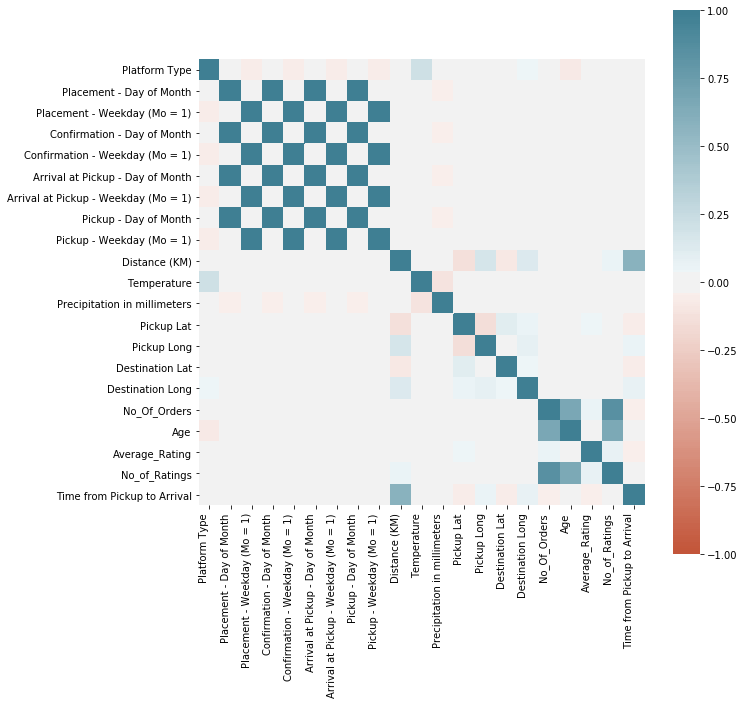

In [41]:
corr = train_set.corr()
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = axes
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Checking correlation against variables to see how variables are correlated to each other. Some variables such as Placement - Day of Month, Placement_weekday, confirmation_day, Confirmation_weekday, arrival at Pickup_day, Pickup_day of month, pickup_weekday are positively correlated to each other meaning they carry the same information throughout the dataframe.

# Checking for Linearity

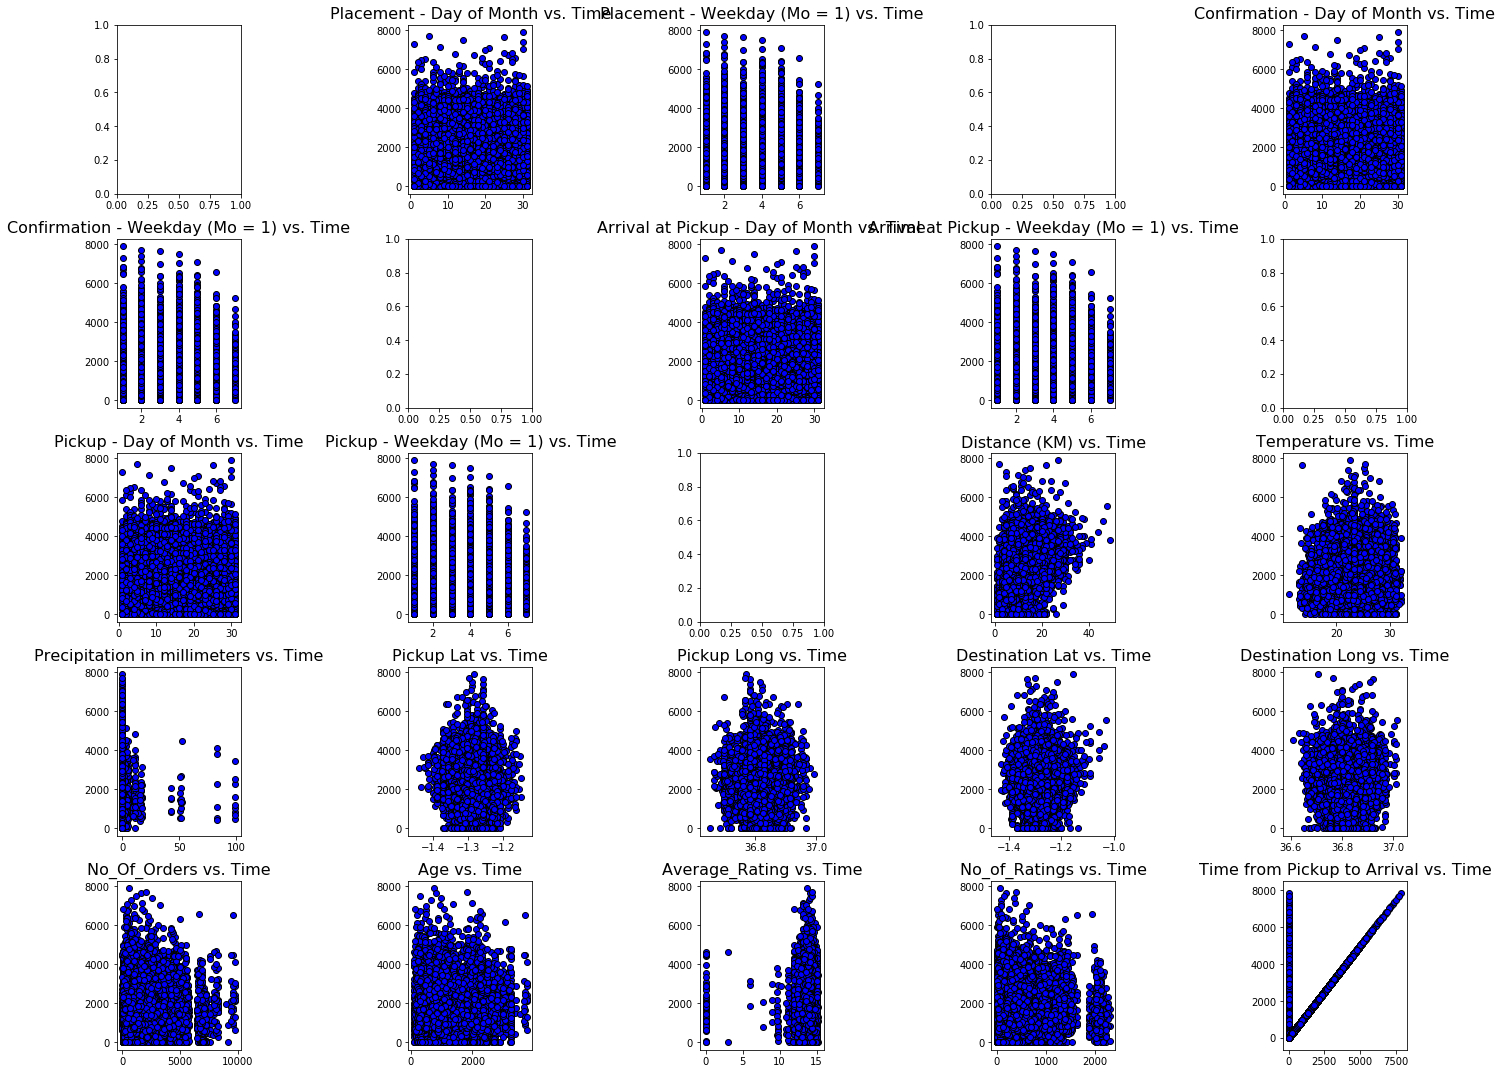

In [42]:
fig, axs = plt.subplots(5,5, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
    if train_set[column].dtype != 'object':
      axs[index-1].set_title("{} vs. Time".format(column),fontsize=16)
      axs[index-1].scatter(x=train_set[column],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

Here we are observing that some variables such as Distance, precipitation and temperature have a linear relationship with our Y variable(Time from Pickup to Arrival) 

In [43]:
#geo_spatial = train_set[['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']]
#BBox1 = (train_set['Pickup Long'].min(),train_set['Pickup Long'].max(),      
         #train_set['Pickup Lat'].min(), train_set['Pickup Lat'].max())
#BBox2 = (train_set['Destination Long'].min(), train_set['Destination Long'].max(),      
        #train_set['Destination Lat'].min(), train_set['Destination Lat'].max())    
#print(BBox1)
#print(BBox2)

In [44]:
#ruh_m = plt.imread(r"C:\Users\Lesedi\Downloads\Maps\Pickup.osm")
#fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(train_set['Pickup Long'], train_set['Pickup Lat'], zorder=1, alpha= 0.2, c='b', s=10)
#ax.set_title('Plotting Spatial Data on Riyadh Map')
#ax.set_xlim(BBox1[0],BBox1[1])
#ax.set_ylim(BBox1[2],BBox1[3])
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [45]:
#BBox2 = ((train_set['Destination Long'].min(), train_set['Destination Long'].max(),      
#        train_set['Destination Lat'].min(), train_set['Destination Lat'].max())    
#BBox1
#print(BBox2)             
#geo_spatial.head()

# Checking the distribution for the dependent variable

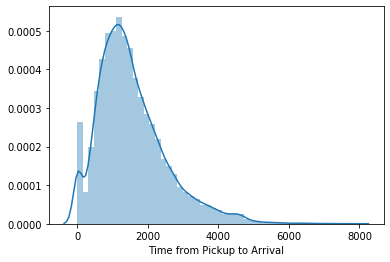

In [46]:
sns.distplot(train_set['Time from Pickup to Arrival'])

It appears that a lot of orders reached their customers between 1800-2000s, Our Distriution for our Y variable is Negatively skewed.

## Preproccessing the Datasets

### Defining a function that will convert our time frame from 12hrs to 24hrs

In [47]:
def convert_to_24hrs(column):
    column = pd.to_datetime(column, format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return column

Our Variabales representing time are converting the time variables into 24hrs time frame because they are currently observed at 12hrs time frame and we noticed that the deliveries runs over a period of business at 24hrs.

In [48]:
train_set['Confirmation - Time'] = pd.to_timedelta(convert_to_24hrs(train_set['Confirmation - Time'] ))
train_set['Placement - Time'] = pd.to_timedelta(convert_to_24hrs(train_set['Placement - Time'] ))
train_set['Arrival at Pickup - Time'] =  pd.to_timedelta(convert_to_24hrs(train_set['Arrival at Pickup - Time'] ))
train_set['Pickup - Time'] =  pd.to_timedelta(convert_to_24hrs(train_set['Pickup - Time'] ))

test_set['Confirmation - Time'] = pd.to_timedelta(convert_to_24hrs(test_set['Confirmation - Time'] ))
test_set['Placement - Time'] = pd.to_timedelta(convert_to_24hrs(test_set['Placement - Time'] ))
test_set['Arrival at Pickup - Time'] =  pd.to_timedelta(convert_to_24hrs(test_set['Arrival at Pickup - Time'] ))
test_set['Pickup - Time'] =  pd.to_timedelta(convert_to_24hrs(test_set['Pickup - Time'] ))

We are passing the fuction we defined above to every time independent variable into the 24hrs conversion function and cahnging the data type from string to time delta.

In [49]:
train_set['Time from Confirmation to placement'] = train_set['Confirmation - Time']- train_set['Placement - Time']
train_set['Waiting Time'] = train_set['Pickup - Time']- train_set['Arrival at Pickup - Time']

test_set['Time from Confirmation to placement'] = test_set['Confirmation - Time']- test_set['Placement - Time']
test_set['Waiting Time'] = test_set['Pickup - Time']- test_set['Arrival at Pickup - Time']

We have Placement Time and Confirmation time, it will be important to see how orders confirmed earlier as oppsed to orders confirmed late affect our Delivery time. 
We calcluated the time difference between the Placement time and Confirmation Time. 

In [50]:
train_set['Time from Confirmation to placement'] = train_set['Time from Confirmation to placement'] / np.timedelta64(1, 's')
train_set['Waiting Time'] = train_set['Waiting Time'] / np.timedelta64(1, 's')

test_set['Time from Confirmation to placement'] = test_set['Time from Confirmation to placement'] / np.timedelta64(1, 's')
test_set['Waiting Time'] = test_set['Waiting Time'] / np.timedelta64(1, 's')

We are converting time from 24hrs time frame into seconds

In [51]:
train_set[['Waiting Time','Time from Pickup to Arrival']]

,Waiting Time,Time from Pickup to Arrival
0,1363.0,745
1,227.0,1993
2,209.0,455
3,310.0,1341
4,90.0,1214
...,...,...
21196,1279.0,9
21197,803.0,770
21198,1235.0,2953
21199,376.0,1380


It appears there is no correlation between the placement and confirmation time with our Y Variable.

# Dropping columns 

In [52]:
train_set.drop(['Confirmation - Time','Placement - Time' ,'Pickup - Time','Arrival at Pickup - Time'],
             axis=1, inplace=True)

test_set.drop(['Confirmation - Time','Placement - Time' ,'Pickup - Time','Arrival at Pickup - Time'],
             axis=1, inplace=True)

In [53]:
column_titles = [col for col in train_set.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
train_set= train_set.reindex(columns=column_titles)

In [54]:
train_set.drop([ 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'No_of_Ratings', 'Age'],
             axis=1, inplace=True)

test_set.drop([ 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'No_of_Ratings', 'Age'],
             axis=1, inplace=True)

# Converting longitude and latitude columns from continuous variables to distance

In [34]:
def find_true_distance(Pick_up_lat, Pick_up_long, Destination_lat, Destination_long):
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373.0

    Pick_up_lat = Pick_up_lat.apply(lambda x: radians(x))
    Pick_up_long = Pick_up_long.apply(lambda x: radians(x))
    Destination_lat = Destination_lat.apply(lambda x: radians(x))
    Destination_long = Destination_long.apply(lambda x: radians(x))

    dlon = Destination_long - Pick_up_long
    dlat = Destination_lat - Pick_up_lat 

    a = dlat.apply(lambda x: sin( x/ 2)**2) + Pick_up_lat.apply(lambda x: cos(x)) * Destination_lat.apply(lambda x: cos(x)) * dlon.apply(lambda x : sin(x / 2)**2)
    c = 2 * a.apply(lambda x: atan2(sqrt(x), sqrt(1 - x)))

    return round(R * c)

In [35]:
train_set['True Distance'] = find_true_distance(train_set['Pickup Lat'], train_set['Pickup Long'], train_set['Destination Lat'], train_set['Destination Long'])

test_set['True Distance'] = find_true_distance(test_set['Pickup Lat'], test_set['Pickup Long'], test_set['Destination Lat'], test_set['Destination Long'])

In [36]:
train_set[['True Distance', 'Distance (KM)']]

,True Distance,Distance (KM)
0,2.0,4
1,11.0,16
2,2.0,3
3,5.0,9
4,4.0,9
...,...,...
21196,2.0,3
21197,4.0,7
21198,11.0,20
21199,9.0,13


In [37]:
train_set.drop(['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long'],
             axis=1, inplace=True)


In [38]:
test_set.drop(['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long'],
             axis=1, inplace=True)

In [39]:
column_titles = [col for col in train_set.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
train_set= train_set.reindex(columns=column_titles)

In [40]:
train_set.head()

,Platform Type,Personal or Business,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,No_Of_Orders,Average_Rating,Time from Confirmation to placement,Waiting Time,True Distance,Time from Pickup to Arrival
0,3,Business,9,5,4,20.400000,0.0,1637,13.8,264.0,1363.0,2.0,745
1,3,Personal,12,5,16,26.400000,0.0,396,13.6,425.0,227.0,11.0,1993
2,3,Business,30,2,3,23.258889,0.0,1023,12.5,199.0,209.0,2.0,455
3,3,Business,15,5,9,19.200000,0.0,886,14.5,31.0,310.0,5.0,1341
4,1,Personal,13,1,9,15.400000,0.0,2311,14.1,60.0,90.0,4.0,1214


In [41]:
test_set.head()

,Platform Type,Personal or Business,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,No_Of_Orders,Average_Rating,Time from Confirmation to placement,Waiting Time,True Distance
0,3,Business,27,3,8,23.24612,0.0,439,13.3,19.0,823.0,6.0
1,3,Business,17,5,5,23.24612,0.0,488,14.4,102.0,310.0,3.0
2,3,Business,27,4,5,22.80000,0.0,833,13.1,1011.0,1474.0,4.0
3,3,Business,17,1,5,24.50000,0.0,487,13.7,112.0,851.0,3.0
4,3,Business,11,2,6,24.40000,0.0,4761,14.1,257.0,525.0,3.0


# EDA After data preprocessing

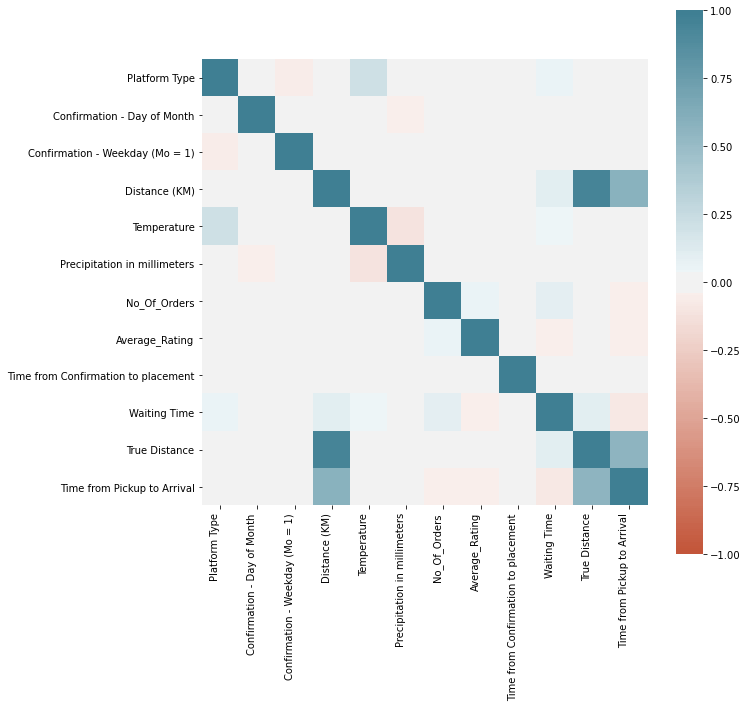

In [42]:
corr = train_set.corr()
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = axes
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

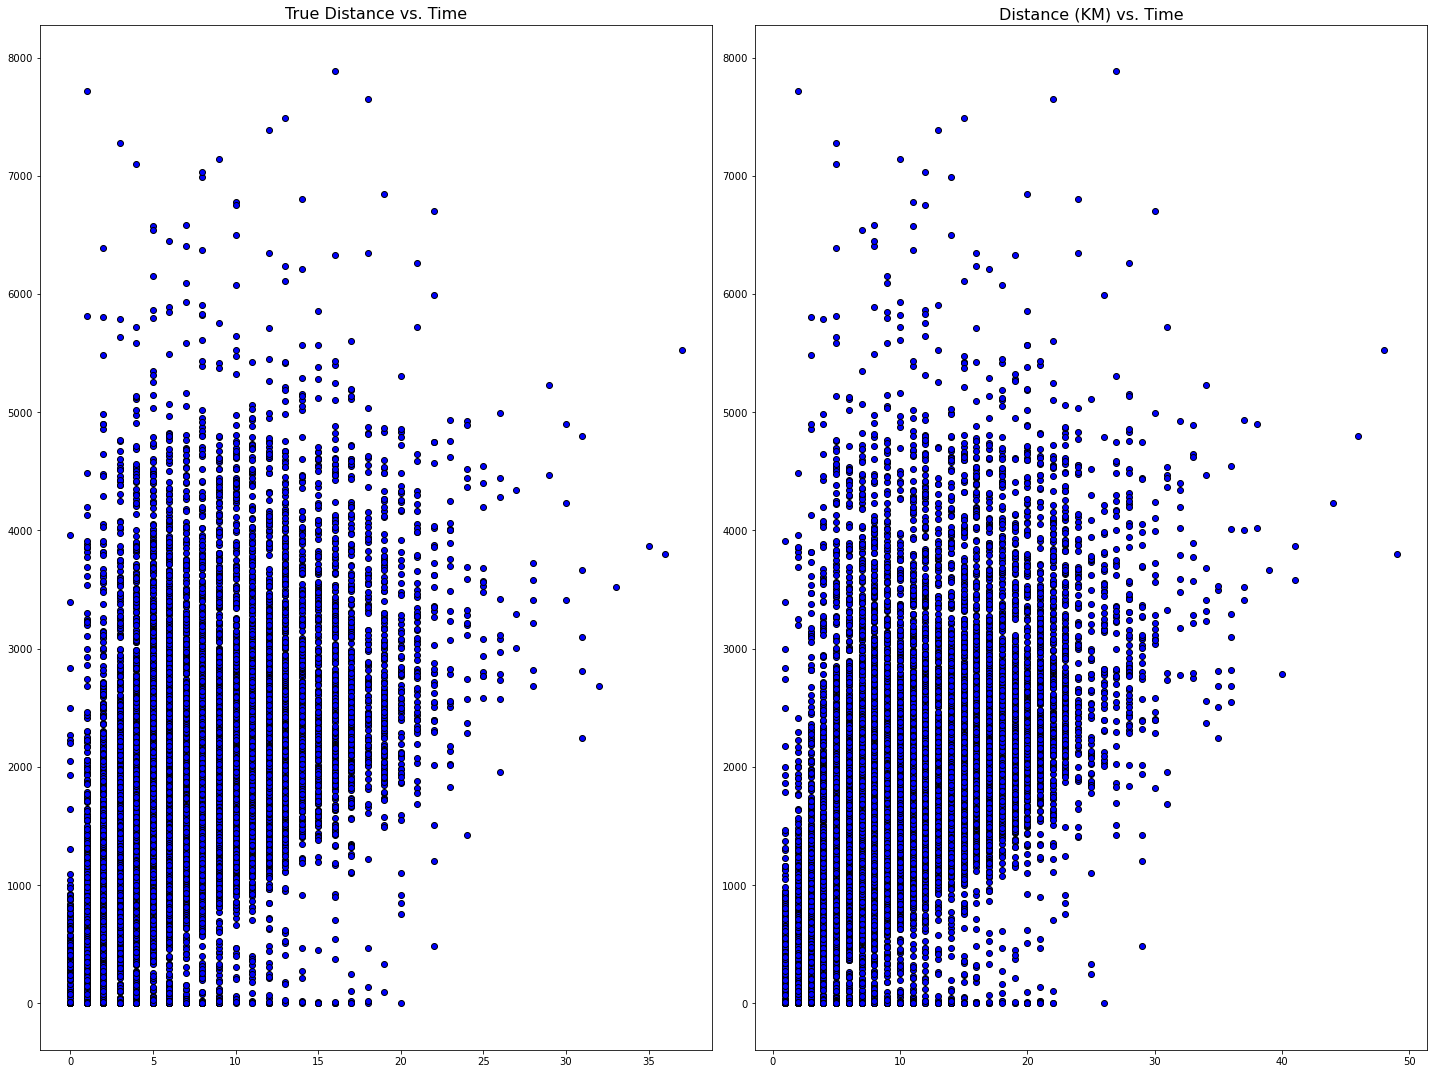

In [43]:
fig, axs = plt.subplots(1,2, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

axs[0].set_title("{} vs. Time".format('True Distance'),fontsize=16)
axs[0].scatter(x=train_set['True Distance'],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

axs[1].set_title("{} vs. Time".format('Distance (KM)'),fontsize=16)
axs[1].scatter(x=train_set['Distance (KM)'],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [44]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.0,3.0,3.000000,3.0,4.0
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.0,8.0,15.000000,23.0,31.0
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.0,2.0,3.000000,5.0,7.0
Distance (KM),21201.0,9.506533,5.668963,1.0,5.0,8.000000,13.0,49.0
Temperature,21201.0,23.258889,3.222006,11.2,21.4,23.258889,25.3,32.1
Precipitation in millimeters,21201.0,0.205839,3.029194,0.0,0.0,0.000000,0.0,99.1
No_Of_Orders,21201.0,1692.423706,1574.308302,2.0,557.0,1212.000000,2311.0,9756.0
Average_Rating,21201.0,13.882520,0.916071,0.0,13.6,14.000000,14.3,15.2
Time from Confirmation to placement,21201.0,433.231121,1025.742011,-4664.0,27.0,69.000000,289.0,14480.0
Waiting Time,21201.0,744.186406,761.216606,60.0,263.0,491.000000,929.0,5985.0


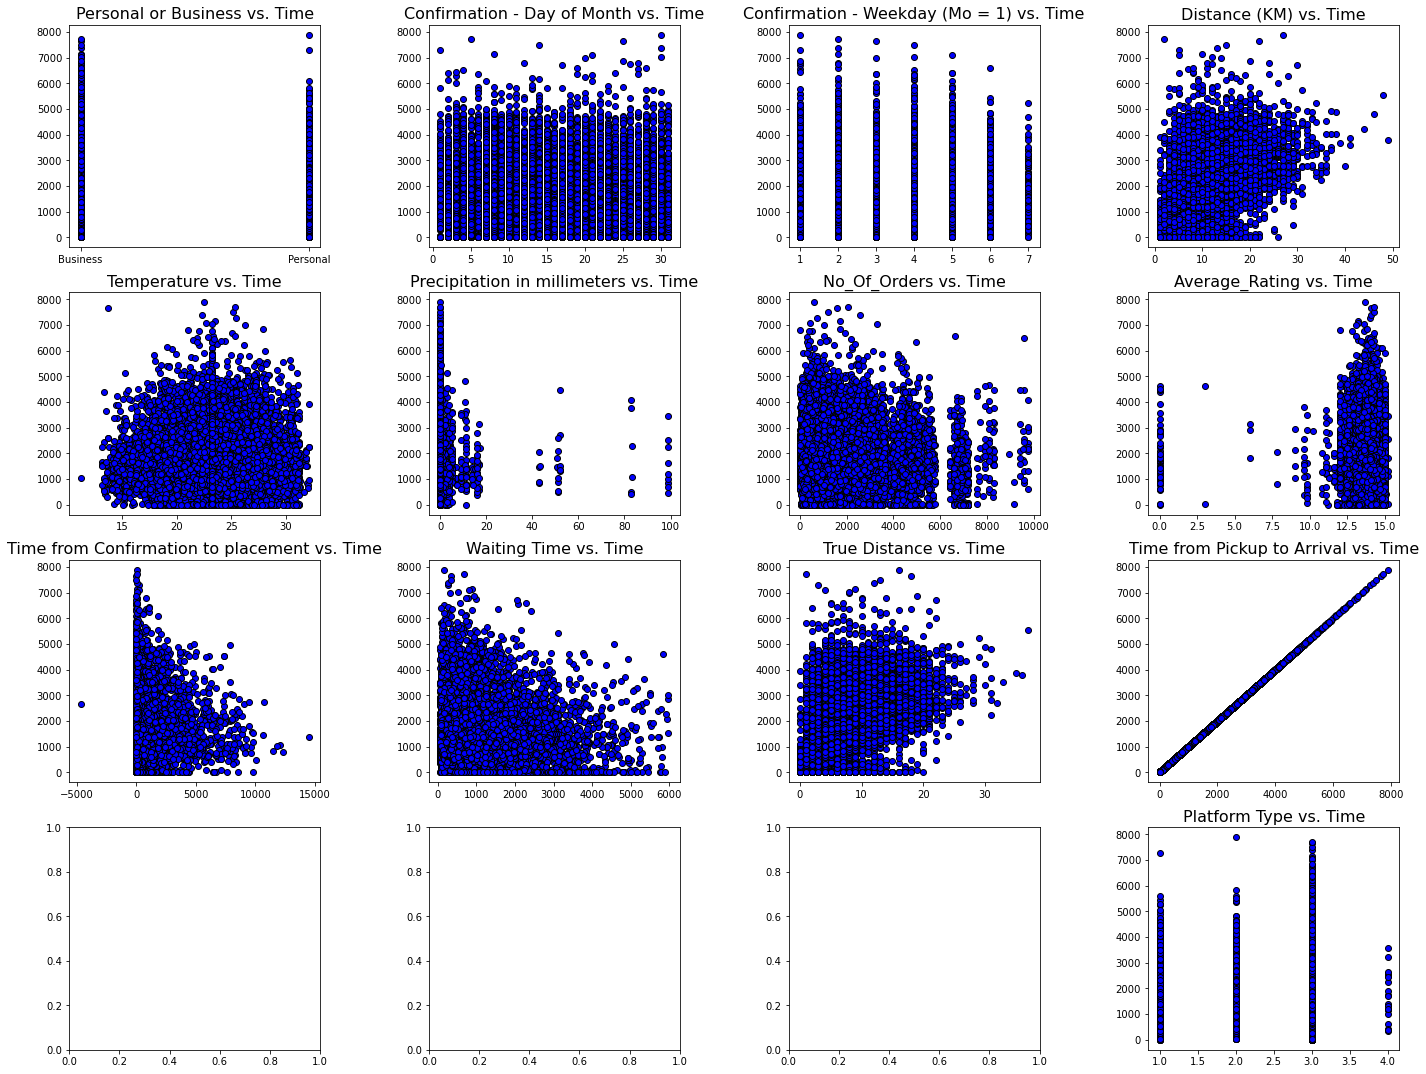

In [45]:
fig, axs = plt.subplots(4,4, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
      axs[index-1].set_title("{} vs. Time".format(column),fontsize=16)
      axs[index-1].scatter(x=train_set[column],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

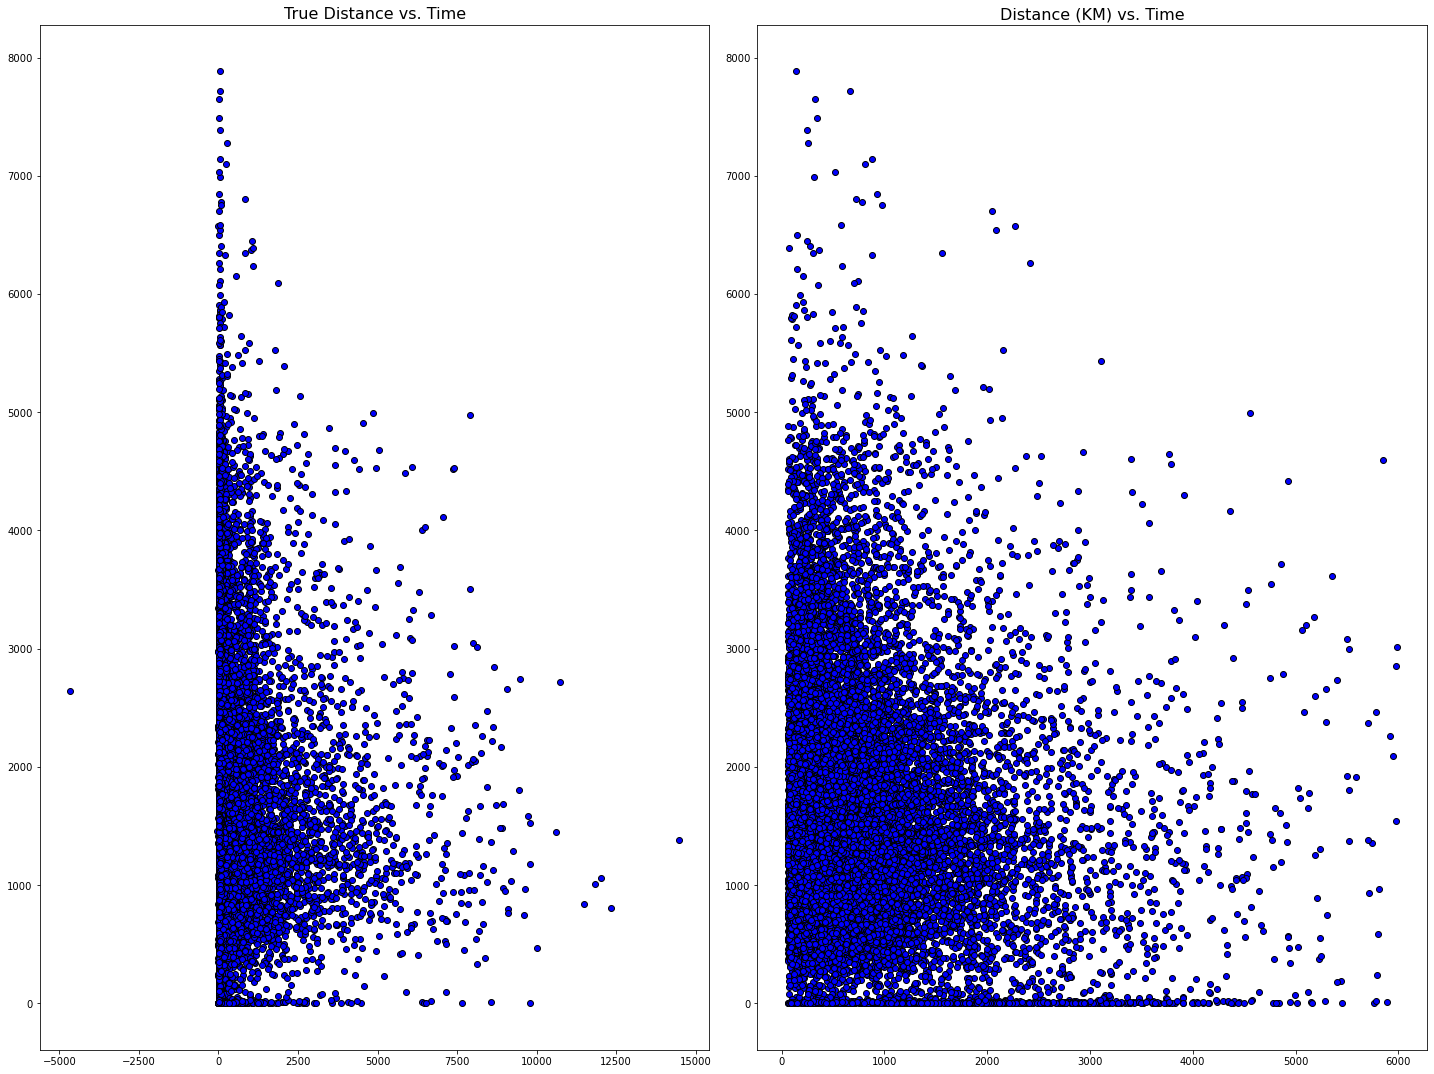

In [46]:
fig, axs = plt.subplots(1,2, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

axs[0].set_title("{} vs. Time".format('True Distance'),fontsize=16)
axs[0].scatter(x=train_set['Time from Confirmation to placement'],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

axs[1].set_title("{} vs. Time".format('Distance (KM)'),fontsize=16)
axs[1].scatter(x=train_set['Waiting Time'],y=train_set['Time from Pickup to Arrival'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [47]:
y_train = train_set.iloc[:,-1].values
y_train.reshape(len(y_train),1)

array([[ 745],
       [1993],
       [ 455],
       ...,
       [2953],
       [1380],
       [2128]], dtype=int64)

In [48]:
X_train = train_set.iloc[:,:-1].values
X_train

array([[3, 'Business', 9, ..., 264.0, 1363.0, 2.0],
       [3, 'Personal', 12, ..., 425.0, 227.0, 11.0],
       [3, 'Business', 30, ..., 199.0, 209.0, 2.0],
       ...,
       [3, 'Business', 7, ..., 53.0, 1235.0, 11.0],
       [1, 'Personal', 4, ..., 14.0, 376.0, 9.0],
       [3, 'Business', 26, ..., 14.0, 1046.0, 9.0]], dtype=object)

In [49]:
X_test = test_set.iloc[:,:].values
X_test

array([[3, 'Business', 27, ..., 19.0, 823.0, 6.0],
       [3, 'Business', 17, ..., 102.0, 310.0, 3.0],
       [3, 'Business', 27, ..., 1011.0, 1474.0, 4.0],
       ...,
       [3, 'Business', 5, ..., 24.0, 457.0, 5.0],
       [3, 'Personal', 29, ..., 79.0, 348.0, 16.0],
       [3, 'Business', 4, ..., 391.0, 398.0, 7.0]], dtype=object)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop='first'), [0,1])], remainder = 'passthrough')
X_train = np.array(ct.fit_transform(X_train))

#ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop='first'), [0,1])], remainder = 'passthrough')
X_test = np.array(ct.transform(X_test))

In [51]:
X_train.shape

(21201, 14)

In [52]:
X_test.shape

(7068, 14)

## Feature Scaling

In [53]:
print(X_train)
print(X_test)

[[0.0 1.0 0.0 ... 264.0 1363.0 2.0]
 [0.0 1.0 0.0 ... 425.0 227.0 11.0]
 [0.0 1.0 0.0 ... 199.0 209.0 2.0]
 ...
 [0.0 1.0 0.0 ... 53.0 1235.0 11.0]
 [0.0 0.0 0.0 ... 14.0 376.0 9.0]
 [0.0 1.0 0.0 ... 14.0 1046.0 9.0]]
[[0.0 1.0 0.0 ... 19.0 823.0 6.0]
 [0.0 1.0 0.0 ... 102.0 310.0 3.0]
 [0.0 1.0 0.0 ... 1011.0 1474.0 4.0]
 ...
 [0.0 1.0 0.0 ... 24.0 457.0 5.0]
 [0.0 1.0 0.0 ... 79.0 348.0 16.0]
 [0.0 1.0 0.0 ... 391.0 398.0 7.0]]


In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [55]:
print(X_train)

[[-0.22014647  0.41750497 -0.03072853 ... -0.16498799  0.81294625
  -1.01525517]
 [-0.22014647  0.41750497 -0.03072853 ... -0.00802474 -0.67943684
   1.00310118]
 [-0.22014647  0.41750497 -0.03072853 ... -0.22835824 -0.70308375
  -1.01525517]
 ...
 [-0.22014647  0.41750497 -0.03072853 ... -0.37069759  0.64479041
   1.00310118]
 [-0.22014647 -2.39518105 -0.03072853 ... -0.40871974 -0.48369293
   0.55457754]
 [-0.22014647  0.41750497 -0.03072853 ... -0.40871974  0.3964978
   0.55457754]]


In [56]:
print(X_test)

[[-0.22340742  0.41840452 -0.0291482  ... -0.40906732  0.11768049
  -0.11291473]
 [-0.22340742  0.41840452 -0.0291482  ... -0.32680802 -0.57059627
  -0.79367783]
 [-0.22340742  0.41840452 -0.0291482  ...  0.57408008  0.99110771
  -0.5667568 ]
 ...
 [-0.22340742  0.41840452 -0.0291482  ... -0.40411194 -0.37337076
  -0.33983576]
 [-0.22340742  0.41840452 -0.0291482  ... -0.34960276 -0.5196128
   2.15629562]
 [-0.22340742  0.41840452 -0.0291482  ... -0.04038705 -0.4525293
   0.11400631]]


## Multiple Linear Model


In [57]:
from sklearn.linear_model import LinearRegression
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = multiple_linear.predict(X_train)
y_pred

array([ 853.01904751, 2438.74390783, 1027.98928491, ..., 2524.55885645,
       1925.59573257, 1818.52270808])

In [60]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

786.0372744352253


In [61]:
#final_y=multiple_linear.predict(X_test)

In [62]:
import pickle
save_path ="multiple_linear_regression.pkl"
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(multiple_linear, open(save_path,'wb'))

Training completed. Saving model to: multiple_linear_regression.pkl


In [63]:
model_load_path = "multiple_linear_regression.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [64]:
final_y= unpickled_model.predict(X_test)

## Support Vector Regression Model

In [65]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train,y_train)

SVR()

In [ ]:
y_pred1 = svr_model.predict(X_train)
y_pred1

In [ ]:
#from sklearn import metrics
#print(np.sqrt(metrics.mean_squared_error(y_train,y_pred1)))

In [ ]:
final_y1=svr_model.predict(X_test)

## Polynomial Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

In [ ]:
#y_pred2 =lin_reg.predict(X_train)
#y_pred2

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred2)))

In [ ]:
final_y2=lin_reg.predict(X_test)

## Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 0)
dt_model.fit(X_train, y_train)

In [ ]:
y_pred3 =dt_model.predict(X_train)
y_pred3

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred3)))

In [ ]:
final_y3=dt_model.predict(X_test)

## Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_model.fit(X_train, y_train)

In [66]:
y_pred4 = rf_model.predict(X_train)
y_pred4

In [67]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred4)))

In [68]:
final_y4=rf_model.predict(X_test)

In [69]:
submission_df = test_copy[['Order No']]
submission_df['Time from Pickup to Arrival'] =final_y

<ipython-input-69-5e7baf1fa286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Time from Pickup to Arrival'] =final_y


In [70]:
#submission_df.to_csv(r'C:\Users\venetia mokgawa\Downloads\Sendy dataset\Random2_model.csv',index=False)

## **MODEL #1**

## **MODEL #2**

## **MODEL #3**